In [60]:
import glob
import json

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [61]:
df_cards = []
all_records = []
for filename in glob.glob('../input/*_JSON_*'):
    with open(filename) as fin:
        for record in tqdm(map(json.loads, fin)):
            for card in record['player'].get('hand', []):
                card['turn'] = record['turn']
                card['gamestate_id'] = record['gamestate_id']
                card['decision'] = record['decision']
                card['hero'] = record['player']['hero']['hero_card_id']
                df_cards.append(card)
                all_records.append(record)
df = pd.DataFrame.from_records(df_cards)

In [3]:
heroes = {
    25: 'shaman',
    326: 'hunter',
    390: 'warlock',
    494: 'mage',
    612: 'druid',
    754: 'rogue',
    798: 'priest',
    981: 'paladin',
    1235: 'warrior'
}

# Задание 1

In [44]:
# get dataframe with [hero1, hero2, descision]
all_rec_df = pd.DataFrame([(record['player']['hero']['hero_card_id'], record['opponent']['hero']['hero_card_id'], 
                            record['decision']) 
                           for record in all_records], columns=['hero1', 'hero2', 'decision'])

In [107]:
#get winrates and rename table
winrates = all_rec_df.groupby(['hero1', 'hero2'])['decision'].mean()#.groupby('hero2')['decision']
winrates.name = 'winrate'

In [108]:
# Unstack dataframe and rename heroes ids
wr = pd.DataFrame(winrates).rename(heroes, level=0).rename(heroes, level=1).unstack()

In [109]:
wr

winrate                                                              \
hero2       druid    hunter      mage   paladin    priest     rogue    shaman   
hero1                                                                           
druid    0.481535  0.493059  0.499659  0.495676  0.493580  0.498933  0.481967   
hunter   0.511360  0.484766  0.501777  0.502375  0.498902  0.497866  0.486868   
mage     0.472710  0.490263  0.478505  0.500101  0.492019  0.495812  0.483165   
paladin  0.481438  0.489381  0.509378  0.497768  0.513639  0.488758  0.485734   
priest   0.510035  0.478049  0.506536  0.505544  0.511002  0.503174  0.498279   
rogue    0.480907  0.481082  0.499254  0.484115  0.481939  0.484539  0.482277   
shaman   0.501467  0.493579  0.514331  0.502595  0.496285  0.504875  0.497927   
warlock  0.492162  0.506332  0.510062  0.491555  0.494365  0.506532  0.496003   
warrior  0.490658  0.493252  0.520759  0.497189  0.521228  0.501505  0.501851   

                             
hero2     warlock   warrior  
hero1                        
druid    0.509310  0.500472  
hunter   0.493590  0.524871  
mage     0.480531  0.462521  
paladin  0.489486  0.476657  
priest   0.497251  0.485901  
rogue    0.496418  0.476980  
shaman   0.510762  0.504431  
warlock  0.505349  0.482116  
warrior  0.480517  0.521044

# Задание 2


По каждой уникальной карте сделать таблицу с полями: name	poisonous	shield	stealth	taunt	turn	type	windfury hero_name 

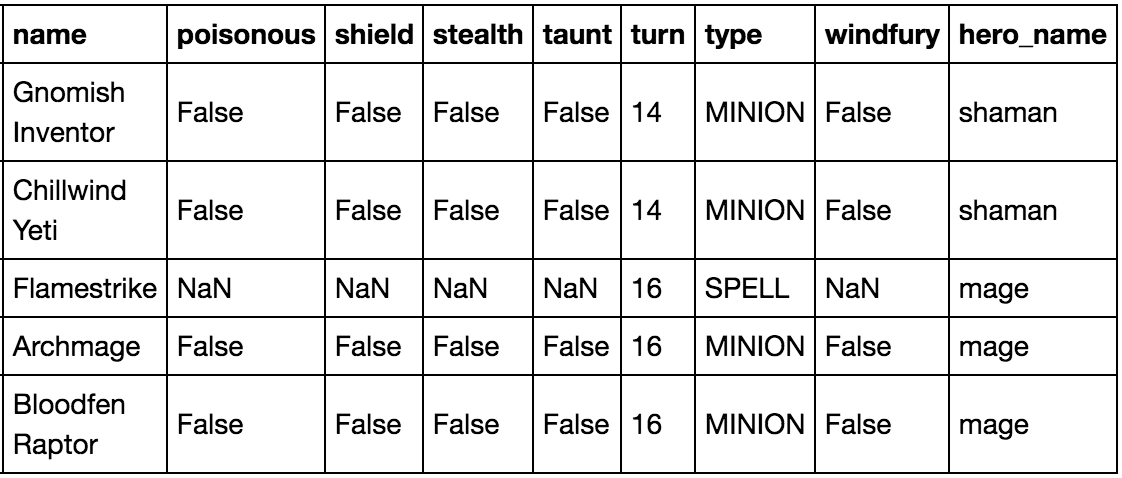

In [4]:
unique_card_names = df.name.unique()

In [35]:
req_fields = ['name', 'poisonous', 'shield', 'stealth', 'taunt', 'turn', 'type', 'windfury', 'hero']
records = []
for name in unique_card_names:
    record = df[df['name'] == name].iloc[0][req_fields]
    records.append(pd.DataFrame([record.values], columns=record.index))
res_df = pd.concat(records, ignore_index=True)

In [37]:
res_df['hero'] = res_df['hero'].apply(lambda x: heroes[x])

In [41]:
res_df.head(20)

,name,poisonous,shield,stealth,taunt,turn,type,windfury,hero
0,Guardian of Kings,0.0,0.0,0.0,0.0,14,MINION,0.0,paladin
1,Murloc Tidehunter,0.0,0.0,0.0,0.0,14,MINION,0.0,paladin
2,Truesilver Champion,NaN,NaN,NaN,NaN,14,WEAPON,NaN,paladin
3,Acidic Swamp Ooze,0.0,0.0,0.0,0.0,14,MINION,0.0,paladin
4,Stormwind Champion,0.0,0.0,0.0,0.0,14,MINION,0.0,paladin
5,Chillwind Yeti,0.0,0.0,0.0,0.0,7,MINION,0.0,rogue
6,Assassin's Blade,NaN,NaN,NaN,NaN,7,WEAPON,NaN,rogue
7,Assassinate,NaN,NaN,NaN,NaN,7,SPELL,NaN,rogue
8,Deadly Poison,NaN,NaN,NaN,NaN,7,SPELL,NaN,rogue
9,Ironbark Protector,0.0,0.0,0.0,1.0,5,MINION,0.0,druid


# Задание 3

Посчитать средний винрейт(средний decision) по каждой карте (среди колод, где данная карта присутствует)

In [50]:
all_records[0].keys()

dict_keys(['player', 'opponent', 'turn', 'decision', 'gamestate_id'])

In [47]:
all_records[0]['player'].keys()

dict_keys(['hand', 'played_cards', 'hero', 'stats'])

In [54]:
all_records[0]['player']['hero'].keys()

dict_keys(['armor', 'attack', 'hero_card_id', 'hp', 'special_skill_used', 'weapon_durability'])

In [46]:
all_records[0]['player']['stats'].keys()

dict_keys(['crystals_all', 'crystals_current', 'deck_count', 'fatigue_damage', 'hand_count', 'played_minions_count', 'spell_dmg_bonus'])

In [51]:
all_records[0]['opponent'].keys()

dict_keys(['played_cards', 'hero', 'stats'])

In [63]:
%%time
cards_winrate = df.groupby('name')['decision'].apply(np.mean)

CPU times: user 520 ms, sys: 65 µs, total: 520 ms
Wall time: 518 ms


In [68]:
(cards_winrate > .50).sum(), (cards_winrate < .50).sum()

(28, 50)

In [69]:
cards_winrate.head()

name
Acidic Swamp Ooze    0.494378
Animal Companion     0.502792
Arcane Intellect     0.483004
Arcane Shot          0.467287
Arcanite Reaper      0.490568
Name: decision, dtype: float64